# Discovering Partial Periodic Pattern in Big Data Using Topk_PPPGrowth Algorithm

In this tutorial, we will discuss two approaches to find Partial Periodic Pattern in big data using Topk_PPPGrowth algorithm.

1. [__Basic approach:__](#basicApproach) Here, we present the steps to discover Partial Periodic Pattern using a single minimum support value
2. [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Partial Periodic Pattern using multiple minimum support values.

***

## <a id='basicApproach'>Basic approach: Executing Topk_PPPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the Topk_PPPGrowth algorithm

In [1]:
from PAMI.partialPeriodicPattern.topk import Topk_PPPGrowth  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
periodCount=5000
periodicSupportCount=100  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the Topk_PPPGrowth algorithm

In [3]:
obj = alg.Topk_PPPGrowth(iFile=inputFile, k=periodicSupportCount,periodicity=periodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

100 100 5000
TopK partial periodic patterns were generated successfully


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.savePatterns(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 100


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 1.4154067039489746


In [8]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 221634560
Memory (USS): 183525376


# Advanced Tutorial on Implementing Topk_PPPGrowth Algorithm

***

#### In this tutorial, we explain how the Topk_PPPGrowth algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the Topk_PPPGrowth algorithm and pandas data frame

In [1]:
from PAMI.partialPeriodicPattern.topk import Topk_PPPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator='\t'
periodCount=500
periodicSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'period','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of Topk_PPPGrowth algorithm

#### Step 3: Execute the Topk_PPPGrowth algorithm using a for loop

In [3]:
algorithm = 'Topk_PPPGrowth'  #specify the algorithm name
for periodicSupportCount in periodicSupportCountList:
    obj = alg.Topk_PPPGrowth('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', k=periodicSupportCount,periodicity=periodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, periodicSupportCount,periodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
    print(result)

100 100 500
TopK partial periodic patterns were generated successfully
        algorithm  minSup  period  patterns   runtime     memory
0  Topk_PPPGrowth     100     500       100  1.380379  222588928
150 150 500
TopK partial periodic patterns were generated successfully
        algorithm  minSup  period  patterns   runtime     memory
0  Topk_PPPGrowth     100     500       100  1.380379  222588928
1  Topk_PPPGrowth     150     500       150  2.054233  223109120
200 200 500
TopK partial periodic patterns were generated successfully
        algorithm  minSup  period  patterns   runtime     memory
0  Topk_PPPGrowth     100     500       100  1.380379  222588928
1  Topk_PPPGrowth     150     500       150  2.054233  223109120
2  Topk_PPPGrowth     200     500       200  3.144208  224133120
250 250 500
TopK partial periodic patterns were generated successfully
        algorithm  minSup  period  patterns   runtime     memory
0  Topk_PPPGrowth     100     500       100  1.380379  222588928
1

#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [4]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

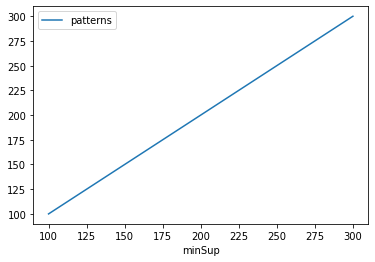

Graph for No Of Patterns is successfully generated!


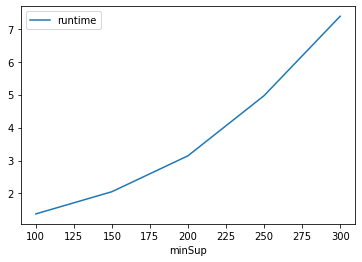

Graph for Runtime taken is successfully generated!


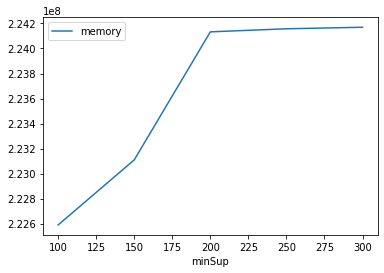

Graph for memory consumption is successfully generated!


In [5]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [6]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
